# Complete Titanic Dataset

The Titanic dataset typically refers to a dataset containing information about the passengers aboard the Titanic, including whether they survived or not. It's a common dataset used for practicing data analysis and machine learning tasks.

Here's a basic outline of the columns you might find in the Titanic dataset:

# PassengerId:
A unique identifier for each passenger.

# Survived:
Whether the passenger survived (1) or not (0).

# Pclass: 
The ticket class of the passenger (1st, 2nd, or 3rd class).

# Name: 
The name of the passenger.

# Sex:
The gender of the passenger.

# Age:
The age of the passenger.

# SibSp:
The number of siblings or spouses aboard the Titanic.

# Parch: 
The number of parents or children aboard the Titanic.

# Ticket:
The ticket number.

# Fare: 
The fare the passenger paid.

# Cabin:
The cabin number of the passenger.

# Embarked: 
The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

This dataset is often used for tasks like predicting survival based on various features or exploring patterns in the data related to survival rates. If you need more specific information or the dataset itself, let me know!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/titanic3/titanic3.xls


In [2]:
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.3 MB/s eta 0:00:00


In [3]:
import pandas as pd

# We"ll use a dataset taken from: https://www.kaggle.com/datasets/vinicius150987/titanic3
dfSurvivals = pd.read_excel("../input/titanic3/titanic3.xls", index_col=None)

In [4]:
dfSurvivals.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
# Just use python variable replacement syntax to make the text dynamic.
from IPython.display import Markdown as md

md(f"The Titanic survivals data set consists of {dfSurvivals.shape[1]} different parameters for {dfSurvivals.shape[0]} samples.")

The Titanic survivals data set consists of 14 different parameters for 1309 samples.

In [6]:
dfSurvivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
(dfSurvivals.isnull() | dfSurvivals.empty | dfSurvivals.isna()).sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
dfSurvivals.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
dfSurvivals.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [10]:
def showPercentageNan(colName, dtFrame):
    perc = (dtFrame[colName].isnull().sum() / dtFrame.shape[0])
    print(f"Percent of missing ''{colName}'' records is {round(perc * 100,3)} %")

In [11]:
colNan = [ 
    "fare",
    "cabin",
    "embarked",
    "boat",
    "body",
    "home.dest"
]

for col in colNan:
    showPercentageNan(col, dfSurvivals)

Percent of missing ''fare'' records is 0.076 %
Percent of missing ''cabin'' records is 77.464 %
Percent of missing ''embarked'' records is 0.153 %
Percent of missing ''boat'' records is 62.872 %
Percent of missing ''body'' records is 90.756 %
Percent of missing ''home.dest'' records is 43.086 %


In [12]:
dfSurvivals.drop(["cabin","boat","body","home.dest"], axis=1, inplace=True)

In [13]:
dfSurvivals.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [14]:
dfSurvivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [15]:
dfSurvivals.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [16]:
dfSurvivals.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,False
1305,False,False,False,False,True,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False


In [17]:
dfSurvivals["fare"].fillna(value = dfSurvivals["fare"].mean(), inplace=True)
dfSurvivals["embarked"].fillna(dfSurvivals["embarked"].value_counts().idxmax(), inplace=True)
dfSurvivals["age"].fillna(value = dfSurvivals["age"].mean(), inplace=True)

/tmp/ipykernel_18/155973326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfSurvivals["fare"].fillna(value = dfSurvivals["fare"].mean(), inplace=True)
/tmp/ipykernel_18/155973326.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [18]:
nrAgeNaN = dfSurvivals["age"].isna().sum()
nrFareNaN = dfSurvivals["fare"].isna().sum()
nrEmbarkedNaN = dfSurvivals["embarked"].isna().sum()
print(f"Now we have {nrAgeNaN} missing values on age column!")
print(f"Now we have {nrFareNaN} missing values on fare column!")
print(f"Now we have {nrEmbarkedNaN} missing values on embarked column!")

Now we have 0 missing values on age column!
Now we have 0 missing values on fare column!
Now we have 0 missing values on embarked column!


In [19]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

dfSurvivals["name"] = labelencoder_X.fit_transform(dfSurvivals["name"])
dfSurvivals["embarked"] = labelencoder_X.fit_transform(dfSurvivals["embarked"])
dfSurvivals["ticket"] = dfSurvivals["ticket"].astype(str)
dfSurvivals["ticket"] = labelencoder_X.fit_transform(dfSurvivals["ticket"])

In [20]:
from sklearn.preprocessing import OneHotEncoder

result = OneHotEncoder().fit_transform(dfSurvivals["sex"].values.reshape(-1, 1)).toarray()
dfSurvivals[["Female", "Male"]] = pd.DataFrame(result, index = dfSurvivals.index)
dfSurvivals.drop(["sex"], axis=1, inplace=True)

In [21]:
dfSurvivals.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,embarked,Female,Male
0,1,1,21,29.0000,0,0,187,211.3375,2,1.0,0.0
1,1,1,23,0.9167,1,2,49,151.5500,2,0.0,1.0
2,1,0,24,2.0000,1,2,49,151.5500,2,1.0,0.0
3,1,0,25,30.0000,1,2,49,151.5500,2,0.0,1.0
4,1,0,26,25.0000,1,2,49,151.5500,2,1.0,0.0


In [22]:
dfSurvivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   int64  
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   embarked  1309 non-null   int64  
 9   Female    1309 non-null   float64
 10  Male      1309 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 112.6 KB


In [23]:
dfSurvivals.describe()

,pclass,survived,name,age,sibsp,parch,ticket,fare,embarked,Female,Male
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,652.689076,29.881135,0.498854,0.385027,463.625668,33.295479,1.493506,0.355997,0.644003
std,0.837836,0.486055,377.309849,12.883199,1.041658,0.865560,278.069490,51.738879,0.814244,0.478997,0.478997
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,326.000000,22.000000,0.000000,0.000000,212.000000,7.895800,1.000000,0.000000,0.000000
50%,3.000000,0.000000,652.000000,29.881135,0.000000,0.000000,459.000000,14.454200,2.000000,0.000000,1.000000
75%,3.000000,1.000000,979.000000,35.000000,1.000000,0.000000,727.000000,31.275000,2.000000,1.000000,1.000000
max,3.000000,1.000000,1306.000000,80.000000,8.000000,9.000000,928.000000,512.329200,2.000000,1.000000,1.000000


In [24]:
dfSurvivals.isnull()

,pclass,survived,name,age,sibsp,parch,ticket,fare,embarked,Female,Male
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,False,False
1305,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,False


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X = dfSurvivals.drop("survived", axis=1)
y = dfSurvivals["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)
p_predict = model.predict(X_test)

print("The accuracy is", round(accuracy_score(p_predict, y_test) * 100,2))

The accuracy is 76.34


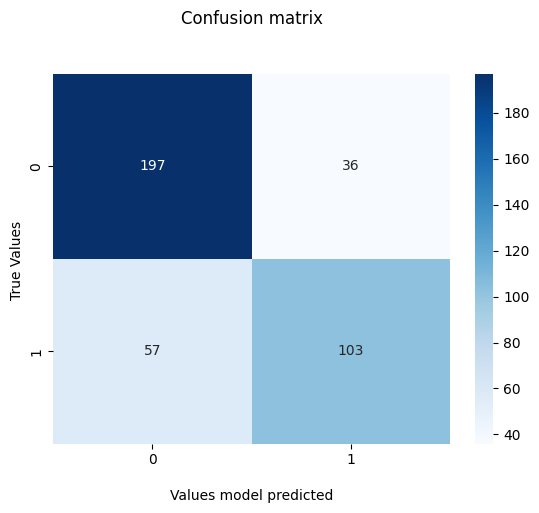

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       233
           1       0.74      0.64      0.69       160

    accuracy                           0.76       393
   macro avg       0.76      0.74      0.75       393
weighted avg       0.76      0.76      0.76       393



In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

confusionMatrix = pd.crosstab(y_test, p_predict)
classificationReport = classification_report(y_test, p_predict)


fx = sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d")
fx.set_title("Confusion matrix\n\n");
fx.set_xlabel("\nValues model predicted")
fx.set_ylabel("True Values ")
plt.show()
print(f"Classification Report\n{classificationReport}")